In [13]:
from diffractio import np, plt, um, mm, nm, degrees
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
import numpy as np

In [14]:
circle_radius = 2 * mm
# beam_radius = 0.75 * mm
beam_radius = 1.5 * circle_radius
area_width = 2 *  circle_radius
screen_distance = 500* mm


x0 = np.linspace(-area_width,area_width, 1024)
y0 = np.linspace(-area_width,area_width, 1024)
wavelength = 632 * nm

In [15]:
u0 = Scalar_source_XY(x0, y0, wavelength)
# u0.beam_width_4s()
u0.gauss_beam(r0=(0 * um, 0 * um), w0=beam_radius, z0=0, A=1, theta=0.0)
# u0.gauss_beams_several_parallel
# u0 = diffraction

(<Figure size 480x360 with 1 Axes>,
 <Axes: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x1fb818ac510>)

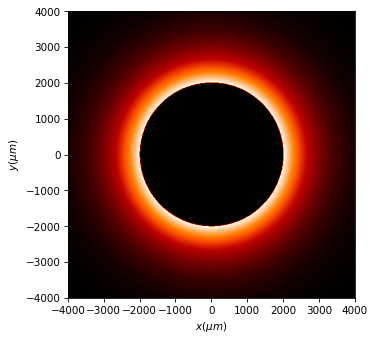

In [16]:
obstacle = Scalar_mask_XY(x0, y0, wavelength)
obstacle.circle(r0=(0 * um, 0 * um), radius=circle_radius)
# obstacle.star(6,[circle_radius, 0.2 * circle_radius] * 6)
# obstacle.square([0,0], circle_radius)
# obstacle.super_ellipse([0,0], circle_radius, [3,3])
# help(obstacle)
# obstacle.pupil([circle_radius]*2)
obstacle.inverse_amplitude()
u1 = u0 * obstacle
u1.draw()

(<Figure size 480x360 with 1 Axes>,
 <Axes: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x1fb818e1d10>)

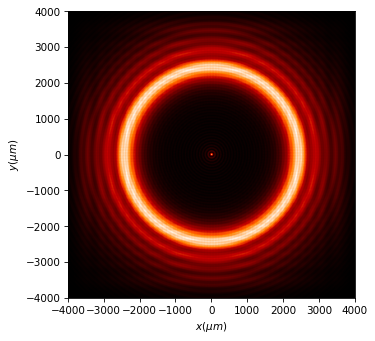

In [17]:
arago_point = u1.RS(z=screen_distance)
arago_point.draw(logarithm=True)

(array([-4000.        , -3996.09184172, -3992.18368344, ...,
         3992.18368344,  3996.09184172,  4000.        ]),
 array([0.0148452 , 0.01418924, 0.01294371, ..., 0.01294371, 0.01418924,
        0.01418924]),
 [-4000.0, 0],
 [4000.0, 0])

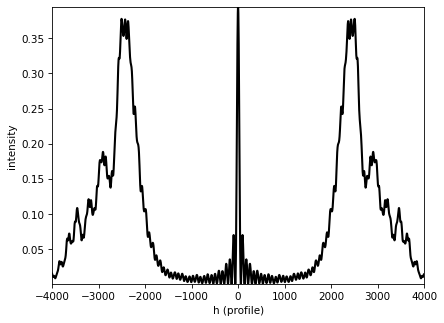

In [18]:
arago_point.draw_profile([-area_width, 0], [area_width, 0], npixels=2048, order=2)